In [248]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

Reading and Exploring data

In [195]:
df = pd.read_csv("/kaggle/input/applai-cv-st23-assignment-1/train.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,...,3,999,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no
1,29,technician,single,university.degree,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
2,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
3,34,services,married,university.degree,no,no,no,cellular,may,thu,...,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
4,32,admin.,single,high.school,no,no,no,cellular,may,fri,...,9,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


In [196]:
print(f"Data has {df.shape[0]} rows.")
print(f"Data has {df.shape[1]} columns. ")
df.dtypes # Checking dtypes of the dataframe

Data has 28831 rows.
Data has 21 columns. 


age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [197]:
#Checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [198]:
#checking for duplicates
df.duplicated().sum()

5

In [199]:
df = df.drop_duplicates(keep=False)

Data Analysis

<Axes: ylabel='y'>

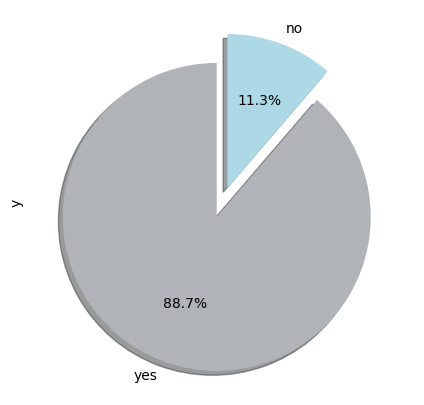

In [20]:
plt.figure(figsize=(10,5))
labels = "yes", "no"

df['y'].value_counts().plot.pie( autopct='%1.1f%%', startangle = 90,  shadow=True, explode=[0.1,0.1], labels=labels, 
                                          colors=['#b0b3b8','lightblue'])

> the target feature is imbalanced

In [200]:
df.loc[df['education'] == 'university.degree', 'education'] = 'university degree'
df.loc[df['education'] == 'professional.course', 'education'] = 'professional course'
df.loc[df['education'] == 'high.school', 'education'] = 'high school'
df.loc[df['education'] == 'basic.9y', 'education'] = '9y'
df.loc[df['education'] == 'basic.6y', 'education'] = '6y'
df.loc[df['education'] == 'basic.4y', 'education'] = '4y'

**Encoding categorical columns**

we will encode poutcome with ordinal encoding since each attribute has a unique weight. day_of_week and month will be label encoded so that each day of week and month number will be represented with its numerical form. Contact column, loan, housing and default will be encoded with one-hot encoding since in each feature, there are only two attributes. education will be encoded with get_dummies.

In [201]:
#We will use label encoding forfunded last 30
from sklearn.preprocessing import LabelEncoder
# First, we will initialize the LabelEncoder object like this:
label_encoder = LabelEncoder()
#After that, we can fit the object into the data like this:
label_encoder.fit(df['day_of_week'])
#Now we can transform the column into a numerical format like this:
df['day_of_week'] = label_encoder.transform(df['day_of_week'])


In [202]:
df["education"].replace(to_replace="unknown",value=0,inplace=True)
df["education"].replace(to_replace="illiterate",value=1,inplace=True)
df["education"].replace(to_replace="4y",value=2,inplace=True)
df["education"].replace(to_replace="6y",value=3,inplace=True)
df["education"].replace(to_replace="9y",value=4,inplace=True)
df["education"].replace(to_replace="high school",value=5,inplace=True)
df["education"].replace(to_replace="professional course",value=6,inplace=True)
df["education"].replace(to_replace="university degree",value=7,inplace=True)

In [203]:
df["month"].replace(to_replace="mar",value=3,inplace=True)
df["month"].replace(to_replace="apr",value=4,inplace=True)
df["month"].replace(to_replace="may",value=5,inplace=True)
df["month"].replace(to_replace="jun",value=6,inplace=True)
df["month"].replace(to_replace="jul",value=7,inplace=True)
df["month"].replace(to_replace="aug",value=8,inplace=True)
df["month"].replace(to_replace="sep",value=9,inplace=True)
df["month"].replace(to_replace="oct",value=10,inplace=True)
df["month"].replace(to_replace="nov",value=11,inplace=True)
df["month"].replace(to_replace="dec",value=12,inplace=True)

In [204]:
df["poutcome"].replace(to_replace="nonexistent",value=0,inplace=True)
df["poutcome"].replace(to_replace="failure",value=1,inplace=True)
df["poutcome"].replace(to_replace="success",value=2,inplace=True)

In [205]:
df = pd.get_dummies(df,columns=['contact'],drop_first=True)
df = pd.get_dummies(df,columns=['loan'],drop_first=True)
df = pd.get_dummies(df,columns=['housing'],drop_first=True)
df = pd.get_dummies(df,columns=['default'],drop_first=True)
df = pd.get_dummies(df,columns=['job'],drop_first=True)
df = pd.get_dummies(df,columns=['marital'],drop_first=True)

**Correlation**

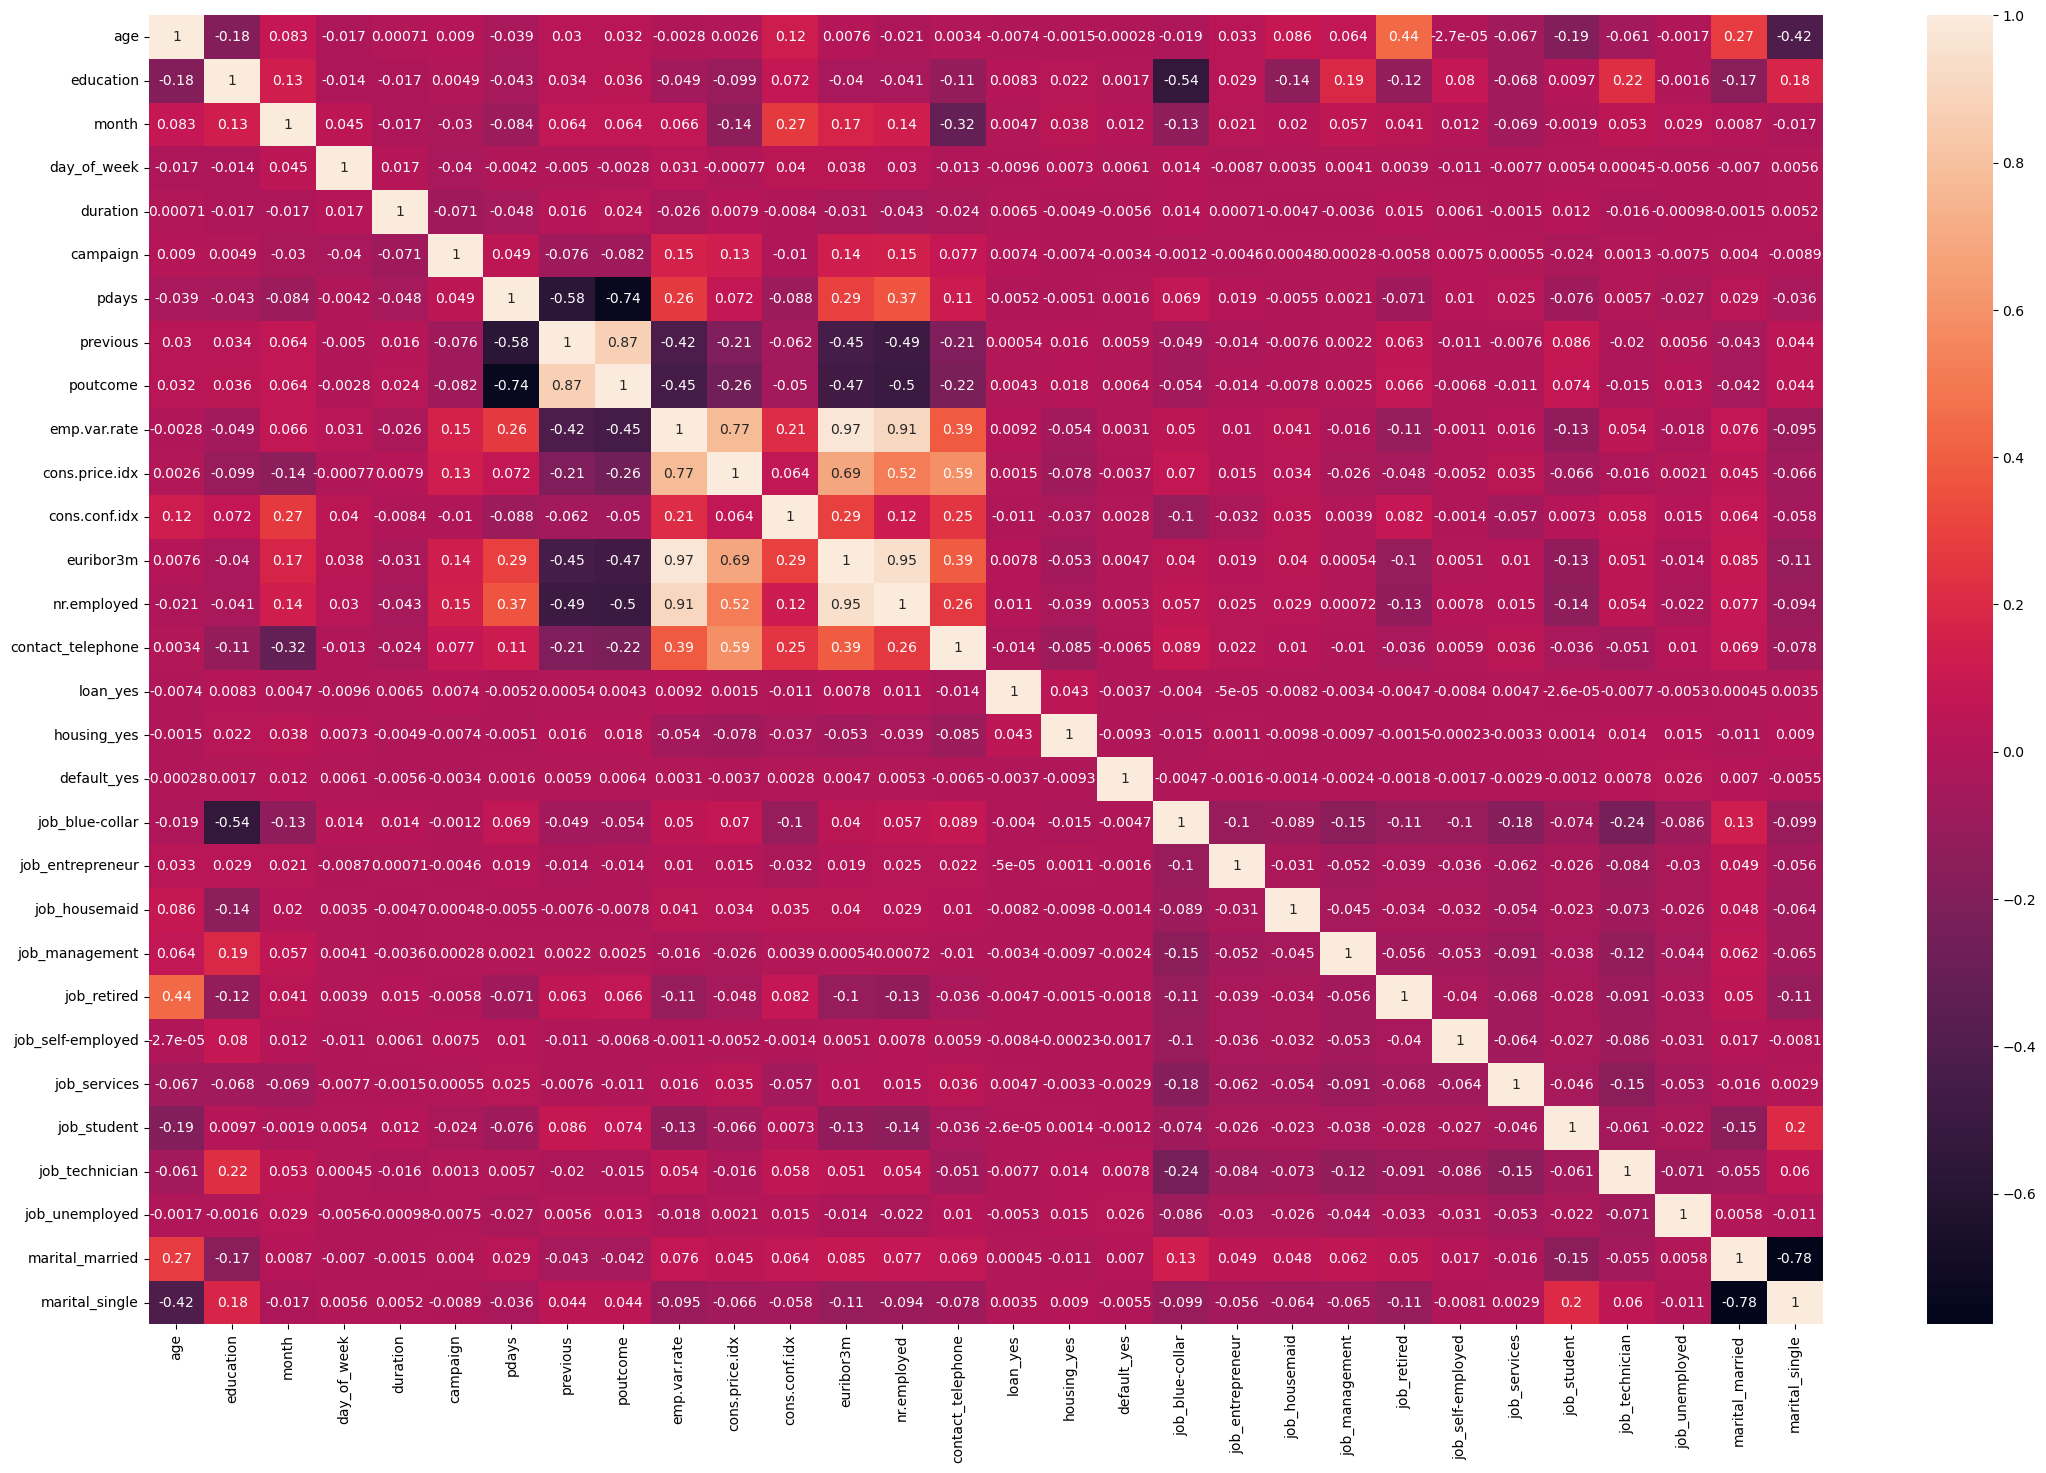

In [43]:
# Heatmap
corr_matrix = df.corr()
plt.figure(figsize = (27,17))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

In [238]:
X = df.drop(['y'], axis=1)
y = df['y']

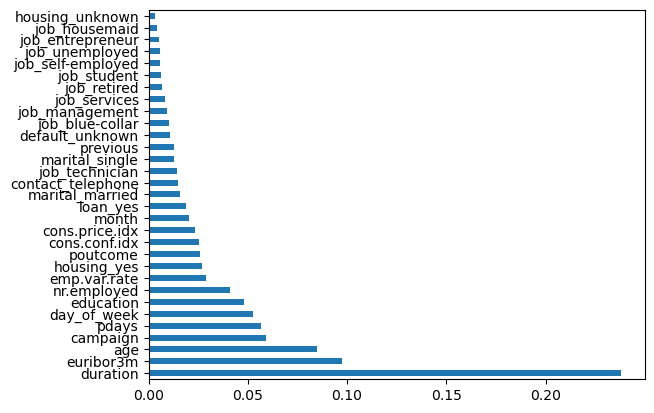

<Figure size 1000x1700 with 0 Axes>

In [207]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

# Plotting graph of feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(31).plot(kind='barh')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(17)

In [208]:
df.to_csv('train_preprocessed.csv')

**Modelling**

we have to encode our target feature so that we put it in our model

In [239]:
label_encoder.fit(df['y'])
#Now we can transform the column into a numerical format like this:
df['y'] = label_encoder.transform(df['y'])

In [240]:
df['y'].value_counts()

0    25570
1     3251
Name: y, dtype: int64

we will do oversampling since our target feature distribution is imbalanced

In [241]:
# random oversampling
from imblearn.over_sampling  import RandomOverSampler
RandomOver = RandomOverSampler(sampling_strategy=1)
X_RandomOver, y_RandomOver = RandomOver.fit_resample(X,y)
print(f' X_shape: {X_RandomOver.shape} \n y_shape: {y_RandomOver.shape}')

 X_shape: (51140, 35) 
 y_shape: (51140,)


we will make a multi-layer perceptron since we do not know if our data is linearly separable. It is better to do it to make sure we get great results.

In [265]:
from sklearn.preprocessing import RobustScaler
rcl = RobustScaler()
X_RandomOver = rcl.fit_transform(X_RandomOver)

**Random oversampling modelling**

In [293]:
# Define the model architecture
model1 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model1.fit(X, Y, epochs=100, batch_size=32)

# Make predictions
predictions = model1.predict(X)

# Print the predictions
print(predictions)

Epoch 1/100
1599/1599 [==============================] - 3s 1ms/step - loss: 0.5082 - accuracy: 0.8595
Epoch 2/100
1599/1599 [==============================] - 2s 1ms/step - loss: 0.3721 - accuracy: 0.8796
Epoch 3/100
1599/1599 [==============================] - 2s 1ms/step - loss: 0.3243 - accuracy: 0.8883
Epoch 4/100
1599/1599 [==============================] - 2s 1ms/step - loss: 0.2867 - accuracy: 0.8953
Epoch 5/100
1599/1599 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.8992
Epoch 6/100
1599/1599 [==============================] - 2s 1ms/step - loss: 0.2599 - accuracy: 0.9027
Epoch 7/100
1599/1599 [==============================] - 2s 1ms/step - loss: 0.2485 - accuracy: 0.9065
Epoch 8/100
1599/1599 [==============================] - 2s 1ms/step - loss: 0.2411 - accuracy: 0.9090
Epoch 9/100
1599/1599 [==============================] - 2s 1ms/step - loss: 0.2381 - accuracy: 0.9129
Epoch 10/100
1599/1599 [==============================] - 2s 1ms/step - l

**Test data**

In [294]:
df_test = pd.read_csv('/kaggle/input/applai-cv-st23-assignment-1/test.csv')
df_test.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,1,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,2,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,3,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,4,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [295]:
df_test.loc[df_test['education'] == 'university.degree', 'education'] = 'university degree'
df_test.loc[df_test['education'] == 'professional.course', 'education'] = 'professional course'
df_test.loc[df_test['education'] == 'high.school', 'education'] = 'high school'
df_test.loc[df_test['education'] == 'basic.9y', 'education'] = '9y'
df_test.loc[df_test['education'] == 'basic.6y', 'education'] = '6y'
df_test.loc[df_test['education'] == 'basic.4y', 'education'] = '4y'

label_encoder.fit(df_test['day_of_week'])
df_test['day_of_week'] = label_encoder.transform(df_test['day_of_week'])

df_test["education"].replace(to_replace="unknown",value=0,inplace=True)
df_test["education"].replace(to_replace="illiterate",value=1,inplace=True)
df_test["education"].replace(to_replace="4y",value=2,inplace=True)
df_test["education"].replace(to_replace="6y",value=3,inplace=True)
df_test["education"].replace(to_replace="9y",value=4,inplace=True)
df_test["education"].replace(to_replace="high school",value=5,inplace=True)
df_test["education"].replace(to_replace="professional course",value=6,inplace=True)
df_test["education"].replace(to_replace="university degree",value=7,inplace=True)

df_test["month"].replace(to_replace="mar",value=3,inplace=True)
df_test["month"].replace(to_replace="apr",value=4,inplace=True)
df_test["month"].replace(to_replace="may",value=5,inplace=True)
df_test["month"].replace(to_replace="jun",value=6,inplace=True)
df_test["month"].replace(to_replace="jul",value=7,inplace=True)
df_test["month"].replace(to_replace="aug",value=8,inplace=True)
df_test["month"].replace(to_replace="sep",value=9,inplace=True)
df_test["month"].replace(to_replace="oct",value=10,inplace=True)
df_test["month"].replace(to_replace="nov",value=11,inplace=True)
df_test["month"].replace(to_replace="dec",value=12,inplace=True)

df_test["poutcome"].replace(to_replace="nonexistent",value=0,inplace=True)
df_test["poutcome"].replace(to_replace="failure",value=1,inplace=True)
df_test["poutcome"].replace(to_replace="success",value=2,inplace=True)

df_test = pd.get_dummies(df_test,columns=['contact'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['loan'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['housing'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['default'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['job'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['marital'],drop_first=True)

X_test = df_test

In [296]:
X_test = X_test.drop('ID', axis=1)

In [297]:
X_test.dtypes

age                    int64
education              int64
month                  int64
day_of_week            int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome               int64
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed          float64
contact_telephone      uint8
loan_unknown           uint8
loan_yes               uint8
housing_unknown        uint8
housing_yes            uint8
default_unknown        uint8
default_yes            uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_married        uint8
marital_single         uint8
marital_unknow

**Save model**

In [299]:
# Export the trained model using pickle
with open('bankmodel.pkl', 'wb') as file:
    pickle.dump(model1, file)

# Load the model from the pickle file
with open('bankmodel.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions on the test data
predictions = loaded_model.predict(X_test)
threshold = 0.5
# Apply thresholding to obtain binary predictions
binary_predictions = np.where(predictions > threshold, 'yes', 'no')
# Create a DataFrame for the binary predictions
output_df = pd.DataFrame(binary_predictions)
# Save the predictions to a CSV file
output_df.to_csv('predictions.csv', index=True)

387/387 [==============================] - 0s 885us/step
